# Final Project
## Clark P. Necciai Jr.
### 11 December 2023

---

#### Q1  

In [1]:
#Import Pandas
import pandas as pd 

#Import and Examine structure of `social_media_usage.csv`
s = pd.read_csv("social_media_usage.csv")
print("Number Rows: {}".format(s.shape[0]))
print("Number Columns: {}".format(s.shape[1]))

Number Rows: 1502
Number Columns: 89


---

#### Q2  

In [2]:
#Import Numpy
import numpy as np

#Function - clean_sm() - If x == 1, return 1 else 0
def clean_sm(x):
    x = np.where(x == 1, 1, 0)
    return(x)

#Create 3-row by 2-col Toy DataFrame 
#check multiple data types: floats, int, string, NA
toy_df = pd.DataFrame(
     {'var_1':[1,3,0],
      'var_2':["Hello", 1.0, np.NaN]}
 )

print("---\nToy DataFrame\n---")
#Toy DataFrame
print(toy_df)

#Apply function to our variables
toy_df['var_1'] = toy_df['var_1'].apply(clean_sm)
toy_df['var_2'] = toy_df['var_2'].apply(clean_sm)
print("---\nTesting clean_sm(x)\n---")
#Function example - Succesful
print(toy_df)

---
Toy DataFrame
---
   var_1  var_2
0      1  Hello
1      3    1.0
2      0    NaN
---
Testing clean_sm(x)
---
   var_1  var_2
0      1      0
1      0      1
2      0      0


---

#### Q3  

In [3]:
#Lambda func for correct check for female 
#(female == 2 in social_media_usage_README.txt)
gender_female = lambda g: 1 if g == 2 else 0

#Create `ss` DataFrame with Specified Variables
ss = pd.DataFrame({
    'sm_li': s['web1h'].apply(clean_sm),
    'income':  np.where(s['income'] > 9, np.nan, s['income']),
    'education': np.where(s['educ2'] > 8, np.nan, s['educ2']),
    'parent': s['par'].apply(clean_sm), # No missing
    'married': s['marital'].apply(clean_sm), #No missing
    'female': s['gender'].apply(gender_female), #No missing
    'age': np.where(s['age'] > 98, np.nan, s['age']),
})

#Data Type Conversion to Categorical
#Code below removes decimal with Int64 then converts to Categorical
ss['sm_li'] = ss['sm_li'].astype('str')
ss['income'] = pd.to_numeric(ss['income'], errors='coerce').astype('Int64').astype('category')
ss['education'] = pd.to_numeric(ss['education'], errors='coerce').astype('Int64').astype('category')
ss['parent'] = ss['parent'].astype('category')
ss['married'] = ss['married'].astype('category')
ss['female'] = ss['female'].astype('category')

#Inspect for NA values
print(ss.isna().sum())

#Drop missing Values
ss.dropna(inplace=True)
ss.head()

sm_li          0
income       229
education     23
parent         0
married        0
female         0
age           54
dtype: int64


,sm_li,income,education,parent,married,female,age
0,0,6,4,0,0,1,77.0
1,0,5,3,0,0,0,59.0
2,0,8,4,0,1,1,60.0
3,0,8,8,0,0,0,73.0
4,1,7,8,0,1,1,65.0


#### Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Examine Data Types
print("Data types :\n---\n", ss.dtypes)

#Confirm no missing values
print("\nMissing/NA Values:\n---\n",ss.isnull().sum())

Data types :
---
 sm_li          object
income       category
education    category
parent       category
married      category
female       category
age           float64
dtype: object

Missing/NA Values:
---
 sm_li        0
income       0
education    0
parent       0
married      0
female       0
age          0
dtype: int64


In [5]:
#Summary Statistics of Categorical Variables By LinkedIn Usage
ss.groupby('sm_li').describe(include=['category', 'object'], exclude='float64')

income                 education                 parent                  \
       count unique top freq     count unique top freq  count unique top freq   
sm_li                                                                           
0        840      9   6  145       840      8   3  221    840      2   0  657   
1        420      9   9  124       420      7   6  157    420      2   0  289   

      married                 female                  
        count unique top freq  count unique top freq  
sm_li                                                 
0         840      2   0  459    840      2   0  465  
1         420      2   1  228    420      2   0  266

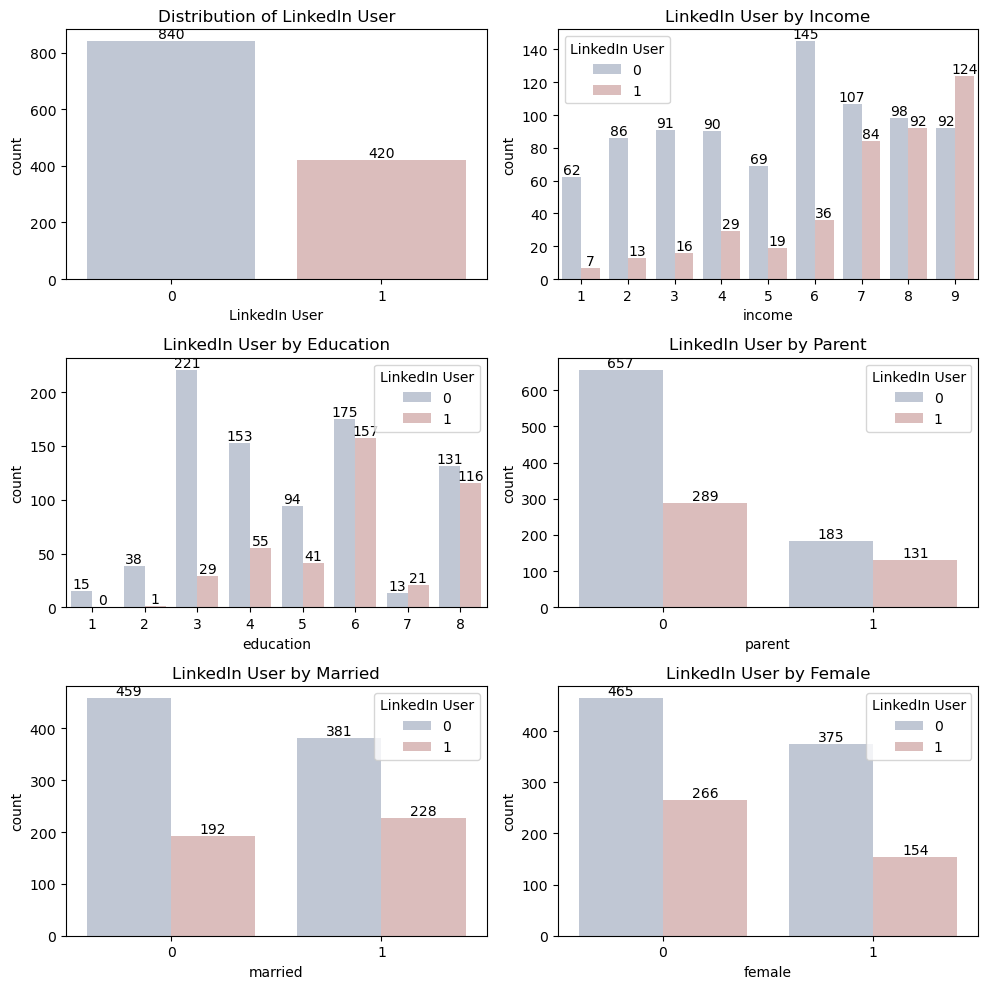

In [6]:
#Plot Preprocessing
custom_palette = "vlag"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

#Attrition Distribution
att_plot = sns.countplot(ss, x = 'sm_li', palette=custom_palette, ax = axes[0, 0])
axes[0, 0].set_title('Distribution of LinkedIn User')
axes[0, 0].set_xlabel("LinkedIn User")
att_plot.bar_label(att_plot.containers[0])

#Attrition by Income
inc_plot = sns.countplot(ss, x = 'income', hue = 'sm_li', palette=custom_palette, ax = axes[0, 1])
inc_plot.legend().set_title("LinkedIn User")
axes[0, 1].set_title('LinkedIn User by Income')
inc_plot.bar_label(inc_plot.containers[0])
inc_plot.bar_label(inc_plot.containers[1])

#LinkedIn User by Education
edu_plot = sns.countplot(ss, x = 'education', hue = 'sm_li', palette=custom_palette, ax = axes[1, 0])
edu_plot.legend().set_title("LinkedIn User")
axes[1, 0].set_title('LinkedIn User by Education')
edu_plot.bar_label(edu_plot.containers[0])
edu_plot.bar_label(edu_plot.containers[1])

#LinkedIn User by Parent
par_plot = sns.countplot(ss, x = 'parent', hue = 'sm_li', palette=custom_palette, ax = axes[1, 1]) 
par_plot.legend().set_title("LinkedIn User")
axes[1, 1].set_title('LinkedIn User by Parent')
par_plot.bar_label(par_plot.containers[0])
par_plot.bar_label(par_plot.containers[1])

#LinkedIn User by Married
mar_plot = sns.countplot(ss, x = 'married', hue = 'sm_li', palette=custom_palette, ax = axes[2, 0]) 
mar_plot.legend().set_title("LinkedIn User")
axes[2, 0].set_title('LinkedIn User by Married')
mar_plot.bar_label(mar_plot.containers[0])
mar_plot.bar_label(mar_plot.containers[1])

#LinkedIn User by Female
fem_plot = sns.countplot(ss, x = 'female', hue = 'sm_li', palette=custom_palette, ax = axes[2, 1])
fem_plot.legend().set_title("LinkedIn User")
axes[2, 1].set_title('LinkedIn User by Female')
fem_plot.bar_label(fem_plot.containers[0])
fem_plot.bar_label(fem_plot.containers[1])

plt.tight_layout()

<Axes: title={'center': 'Distribution of LinkedIn User by Age'}, xlabel='Age', ylabel='LinkedIn User'>

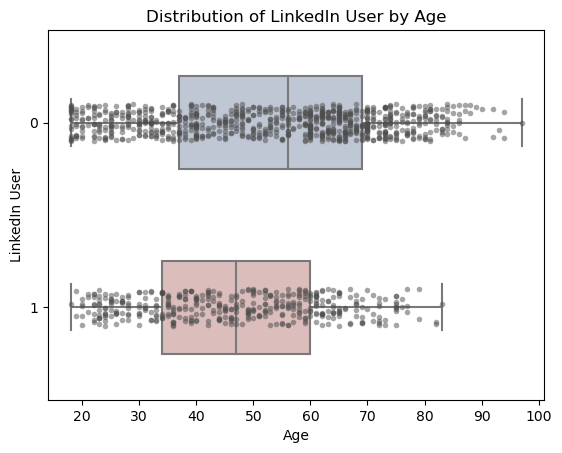

In [7]:
#Boxplot Attrition by Age
age_box = sns.boxplot(
    ss, x = "age", y = "sm_li", palette=custom_palette,
    width = .5
)

#Assign labels/title
age_box.set(xlabel="Age", ylabel="LinkedIn User", title = "Distribution of LinkedIn User by Age")

# Add Points
sns.stripplot(ss, x="age", y="sm_li", size=4, alpha = 0.5, color=".3")

In [8]:
#Summary Statistics of Continuous Variables(`age`) By LinkedIn Usage
ss.groupby("sm_li").describe()

age                                                    
       count       mean        std   min   25%   50%   75%   max
sm_li                                                           
0      840.0  53.325000  19.248958  18.0  37.0  56.0  69.0  97.0
1      420.0  47.111905  15.810765  18.0  34.0  47.0  60.0  83.0

In [9]:
#Import Matplotlib
import matplotlib

#Corr Matrix
correlations = ss.corr()
correlations.style.background_gradient(cmap = 'vlag')

,sm_li,income,education,parent,married,female,age
sm_li,1.000000,0.329674,0.310088,0.102495,0.084226,-0.076186,-0.159209
income,0.329674,1.000000,0.438773,0.093554,0.402396,-0.098204,0.022394
education,0.310088,0.438773,1.000000,0.037349,0.206708,0.052714,0.111718
parent,0.102495,0.093554,0.037349,1.000000,0.246857,0.034091,-0.263081
married,0.084226,0.402396,0.206708,0.246857,1.000000,-0.050469,0.172778
female,-0.076186,-0.098204,0.052714,0.034091,-0.050469,1.000000,0.096999
age,-0.159209,0.022394,0.111718,-0.263081,0.172778,0.096999,1.000000


#### Notable Takeaways

`sm_li`: Imbalance between class labels - twice as many **non**-LinkedIn Users   
`income`/`education`:  Majority of LinkedIn Users fall towards higher levels of income and education  
`parent`:  Notable sized difference between non-parent usage   
`married`: No significant relationship with target variable/lack of disparity between levels  
`female`: Slightly greater proportion of non-females appear to be LinkedIn Users  
`age`:  Younger demographic appear more likely to be LinkedIn Users

---

#### Q4

In [10]:
#Create Target(y) vector and Feature Set(X)
y = ss['sm_li']
X = ss[['income', 'education', 'parent', 'married', 'female', 'age']]

---

#### Q5  

In [11]:
#Create 80/20 Train/Test Split using Scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8675309)

##### Explanation of X_train, y_train, X_test, and y_test in Machine Learning:
- Our training feature set, **X_train**, consists of our predictor variables(`income`, `education`, `parent`, `married`, `female`, `age`) and 80% of their values from our original dataset. These training values will be used in fitting our logistic regression model predicting their corresponding **y_train** labels by providing useful patterns and relationships during the training process.  

- The **y_train** object consists of 80% of the target variable (`sm_li`) values/labels corresponding to the same 80% of values found in **X_train**. These **y_train** labels will be used in conjunction with **X_train**. Our logistic model will seek to predict these **y_train** labels during the model fitting process. 

- Our test feature set, **X_test**, consists of our predictor variables(`income`, `education`, `parent`, `married`, `female`, `age`) and 20% of our original datasets observations. **X_test** consists of *unseen* data and will be used by our estimated logistic regression model after it is fit in predicting target variable classes/probabilities. 

- The **y_test** object consists of 20% of the target variable(`sm_li`) values/labels corresponding to the same 20% of values found in **X_test**. After our fitted model makes predictions utilizing the values within our feature set, **X_test**, we can directly compare these predictions against the test observations' true labels within **y_test** to assess the performance of our model.

---

#### Q6

In [12]:
#Import Logistic Regression from Scikit-learn
from sklearn.linear_model import LogisticRegression as LogReg

#Instantiate Model with balanced class weight and fit with training data
logistic_model = LogReg(class_weight='balanced').fit(X_train, y_train)

---

#### Q7

Model Accuracy: 69.44%
True Positive: 60
True Negative: 115
False Positive: 55
False Negative: 22


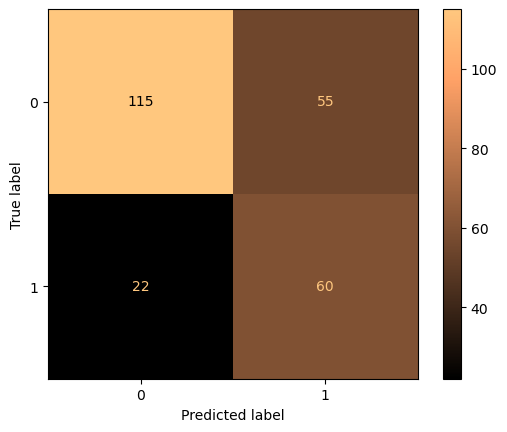

In [13]:
#Import metrics/comfusion matrix visualization
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay as CMD

#Make Predictions over the test set
y_pred = logistic_model.predict(X_test)

#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred).round(4)

#Generate Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Retrieve Individual Cells
TP = conf_mat[1, 1]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
TN = conf_mat[0, 0]

#Display Accuracy/TP/FP/TN/FN
print("Model Accuracy: {}%".format(accuracy*100))
print("True Positive: {}".format(TP))
print("True Negative: {}".format(TN))
print("False Positive: {}".format(FP))
print("False Negative: {}".format(FN))

#Show Confusion Matrix
CMD(conf_mat).plot(cmap='copper')

#### Model Accuracy:

Our model accuracy is approximately **69.44%**.
#### Interpretation of Confusion Matrix:   

Our confusion matrix considers our model's predicted classifications versus the true observed values. Our Predicted label represents those observations which our model classifies as either not being(0) or being(1) LinkedIn users. Our True label represents the actual observed labels. The intersection between these yields four different aspects of model performance explained below:   

**True-Positive**: When the **Predicted label** = 1, and the **True label** = 1, we have correctly predicted an observation to be a LinkedIn user when the observation was a LinkedIn user.     
**True-Negative**: When the **Predicted label** = 0, and the **True label** = 0, we have correctly predicted an observation to not be a LinkedIn user when the observation was not a LinkedIn user.      
**False-Postive**: When the **Predicted label** = 1 and the **True label** = 0, we have incorrectly predicted an observation to be a LinkedIn user when the observation was not a LinkedIn user.  
**False-Negative**: When the **Predicted label** = 0 and the **True label** = 1, we have incorrectly predicted an observation to not be a LinkedIn user when the observation was a LinkedIn user.  

---

#### Q8

In [14]:
#Confusion Matrix as DataFrame
conf_mat = pd.DataFrame({
    'Predicted: Not LinkedIn User' : [TN, FN],
    'Predicted: LinkedIn User' : [FP, TP]
}, index = ["Actual: Not LinkedIn User", "Actual: LinkedIn User"])

#Display Confusion Matrix
conf_mat.style.background_gradient(cmap="copper")

,Predicted: Not LinkedIn User,Predicted: LinkedIn User
Actual: Not LinkedIn User,115,55
Actual: LinkedIn User,22,60


---

#### Q9

In [15]:
#Precision = TP/(TP+FP)
precision =  conf_mat.iloc[1,1] / (conf_mat.iloc[:,1].sum())
#Recall = TP/(TP+FN)
recall = conf_mat.iloc[1,1] / (conf_mat.iloc[1,:]).sum()
#F1_Score
f1_score = (2 * precision * recall) / (precision + recall) 

#Display Calculations
print("By-Hand Calculations of Metrics\n---")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))
print("---")

#Specify Class Labels for Report - Concered with Metrics Associated with `LinkedIn User(1)`
from sklearn.metrics import classification_report
print(classification_report(y_test,
                            y_pred,
                            target_names=["Not LinkedIn User(0)",
                                          "LinkedIn User(1)"]))

By-Hand Calculations of Metrics
---
Precision: 0.52
Recall: 0.73
F1 Score: 0.61
---
                      precision    recall  f1-score   support

Not LinkedIn User(0)       0.84      0.68      0.75       170
    LinkedIn User(1)       0.52      0.73      0.61        82

            accuracy                           0.69       252
           macro avg       0.68      0.70      0.68       252
        weighted avg       0.74      0.69      0.70       252



**Precision = $\frac{TP}{(TP+FP)}$**  
Precision explains how capable our model is in accurately classifying the event/positive class out of all the observations we predict the event/positive class. In our scenario, it refers to how often we correctly predict an observation to use LinkedIn out of the total number of times we predicted an observation to use LinkedIn. We may seek to use precision as a metric of model performance when the cost of misclassifying observations as False Positives would be high. 

As an example relevant to our analysis, say we wish to offer a special promotion to only current LinkedIn users for a free premium upgrade for life. Misclassifying an individual as a current LinkedIn user would result in that individual being sent the special promotion offer when they should have otherwise not received it. If we're seeking to maximize the correct number of people that receive this promotion, we would seek to maximize precision as a performance metric. This in turn can help minimize misclassifications of False-Positives, thereby allowing us to more precisely aim the special promotion towards the correct demographic, current LinkedIn users. 

**Recall = $\frac{TP}{(TP+FN)}$**   
Recall explains how capable our model is in correctly classifying the event/positive class out the total number of observations which are the event/positive class. In our scenario, it refers to how well our model is correctly classifying observations as LinkedIn users out of all observations which are LinkedIn users. We may seek to use recall as a metric of model performance when the cost of misclassifying observations as False Negatives would be high. 

As an example, we might imagine a situation where we seek to classify meltdowns at a nuclear power plant. Misclassifying an observation as *not* being a meltdown(FN) when in reality it *is* a meltdown, would have catastrophic effects. In this scenario, we would undoubtedbly prefer recall as a performance metric for our logistic model as this would enable us to more often classify/identify true instances of meltdowns. By seeking to maximize recall, we minimize our chances of misclassifying False-Negatives.

**F1 Score:   $2\times\frac{(precision \times recall)}{(precision+recall)}$**  
The F1 Score is an alternative approach to measuring a model's accuracy in the case where we have imbalanced classes. Mathematically, it is a weighted average between precision and recall. We may seek to use the F1 Score as a metric of model performance when we wish to consider the tradeoffs inherent in precision and recall together(i.e. misclassifying observations as false-positives and false-negatives). Additionally, we may wish to use the F1 Score when we have imbalanced class observations. 

As an actual example, we can see from our own current LinkedIn analysis that we have double the amount of observations which *are not* LinkedIn users as opposed to observations which *are* LinkedIn users which is an imbalance in our dataset. Inference drawn from the accuracy metric alone may be misleading when disregarding the other aspects of performance, as we are not considering the distribution of classes when calculating accuracy. Our accuracy(.69) is higher than our F1 Score(.61). This is primarily due to the fact that our ability to predict an individual to *not* be a LinkedIn user, is pulling our accuracy up. This is misleading, however, because we have many more observations where the individual is *not* a LinkedIn user. In our scenario, we might actually prefer the F1 Score as a metric over accuracy in assessing model performance due to it being able to handle class imbalance and consider both precision and recall.

---

#### Q10

In [16]:
#High Income/Education, Non-Parent, Married, Female, 42 years old
pred_obs_1 = pd.DataFrame({
    'income' : 8,
    'education' : 7,
    'parent' : 0,
    'married' : 1, 
    'female' : 1,
    'age' : 42}, index=[0])

#High Income/Education, Non-Parent, Married, Female, 82 years old
pred_obs_2 = pd.DataFrame({
    'income' : 8,
    'education' : 7,
    'parent' : 0,
    'married' : 1, 
    'female' : 1,
    'age' : 82}, index=[0])

#Prediction for pred_obs_1 (42 years)
class_1 = logistic_model.predict(pred_obs_1)
prob_1 = logistic_model.predict_proba(pred_obs_1)[0][1]
print("Predicted Class for pred_obs_1: {}".format(class_1))
print("Probability for pred_obs_1: {:.3f}".format(prob_1))

#Prediction for pred_obs_2 (82 years)
class_2 = logistic_model.predict(pred_obs_2)
prob_2 = logistic_model.predict_proba(pred_obs_2)[0][1]
print("---")
print("Predicted Class for pred_obs_2: {}".format(class_2))
print("Probability for pred_obs_2: {:.3f}".format(prob_2))

Predicted Class for pred_obs_1: ['1']
Probability for pred_obs_1: 0.736
---
Predicted Class for pred_obs_2: ['0']
Probability for pred_obs_2: 0.497


**Model Predictions**  
When we predict the probability of a high income(8), high education(7), non-parent(0), married(1), female(1) that is 42 years old being a LinkedIn user, the resulting probability estimated by our Logistic Model is approximately **0.736**. Based on a probability threshold of 0.5 where probabilities higher would be classified as LinkedIn users, this prediction would be classified as a **LinkedIn User**. If we then hold all these factors constant, but modify the age of this same observation to be 82 years old, we find our predicted probability dropping to be approximately **.497**. Based on the same threshold, this prediction would be classified a **not being a LinkedIn User**. 

We see that as our age variable increases from 42 to 82, while holding our other variables constant at the previously specified values, our predicted probability of an observation being a LinkedIn user decreases by approximately **0.239**.

---